In [1]:
%matplotlib inline

import pandas as pd

import os

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import math

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.utils import shuffle

from sklearn.metrics import mean_absolute_error

import xgboost

from catboost import CatBoostRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

PATH = os.path.abspath(os.getcwd())

SEED = 42

sns.set(rc={'figure.figsize':(16,6)})

import warnings

warnings.filterwarnings('ignore')

# Финальный проект

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Задача" data-toc-modified-id="Задача-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Задача</a></span></li><li><span><a href="#Описание-этапа-обработки" data-toc-modified-id="Описание-этапа-обработки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание этапа обработки</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Загрузка-и-осмотр-данных" data-toc-modified-id="Загрузка-и-осмотр-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и осмотр данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Осмотр-данных" data-toc-modified-id="Осмотр-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Осмотр данных</a></span><ul class="toc-item"><li><span><a href="#data_arc---данные-об-электродах" data-toc-modified-id="data_arc---данные-об-электродах-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>data_arc - данные об электродах</a></span></li><li><span><a href="#data_bulk-—-данные-о-подаче-сыпучих-материалов-(объём)" data-toc-modified-id="data_bulk-—-данные-о-подаче-сыпучих-материалов-(объём)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>data_bulk — данные о подаче сыпучих материалов (объём)</a></span></li><li><span><a href="#data_bulk_time-—-данные-о-подаче-сыпучих-материалов-(время)" data-toc-modified-id="data_bulk_time-—-данные-о-подаче-сыпучих-материалов-(время)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>data_bulk_time — данные о подаче сыпучих материалов (время)</a></span></li><li><span><a href="#data_gas-—-данные-о-продувке-сплава-газом" data-toc-modified-id="data_gas-—-данные-о-продувке-сплава-газом-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>data_gas — данные о продувке сплава газом</a></span></li><li><span><a href="#data_temp-—-результаты-измерения-температуры" data-toc-modified-id="data_temp-—-результаты-измерения-температуры-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>data_temp — результаты измерения температуры</a></span></li><li><span><a href="#data_wire-—-данные-о-проволочных-материалах-(объём)" data-toc-modified-id="data_wire-—-данные-о-проволочных-материалах-(объём)-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>data_wire — данные о проволочных материалах (объём)</a></span></li><li><span><a href="#data_wire_time-—-данные-о-проволочных-материалах-(время)" data-toc-modified-id="data_wire_time-—-данные-о-проволочных-материалах-(время)-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>data_wire_time — данные о проволочных материалах (время)</a></span></li></ul></li><li><span><a href="#Вывод-после-осмотра-данных" data-toc-modified-id="Вывод-после-осмотра-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод после осмотра данных</a></span></li><li><span><a href="#План-дальнейшей-работы" data-toc-modified-id="План-дальнейшей-работы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>План дальнейшей работы</a></span></li></ul></li><li><span><a href="#Построение-общей-таблицы-признаков-для-обучения-модели" data-toc-modified-id="Построение-общей-таблицы-признаков-для-обучения-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение общей таблицы признаков для обучения модели</a></span></li><li><span><a href="#Проверка-корреляции-признаков" data-toc-modified-id="Проверка-корреляции-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка корреляции признаков</a></span></li><li><span><a href="#Разбиение-данных-и-масштабирование-признаков" data-toc-modified-id="Разбиение-данных-и-масштабирование-признаков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Разбиение данных и масштабирование признаков</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Отчет" data-toc-modified-id="Отчет-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Отчет</a></span></li></ul></div>

## Описание проекта

### Задача

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Нам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

## Загрузка и осмотр данных

### Загрузка данных

Загрузим наши данные и взглянем на пару строк из каждого датасета.

In [2]:
data_arc = pd.read_csv(PATH + '\\final_steel\\data_arc.csv')
data_bulk = pd.read_csv(PATH + '\\final_steel\\data_bulk.csv')
data_bulk_time = pd.read_csv(PATH + '\\final_steel\\data_bulk_time.csv')
data_gas = pd.read_csv(PATH + '\\final_steel\\data_gas.csv')
data_temp = pd.read_csv(PATH + '\\final_steel\\data_temp.csv')
data_wire = pd.read_csv(PATH + '\\final_steel\\data_wire.csv')
data_wire_time = pd.read_csv(PATH + '\\final_steel\\data_wire_time.csv')

In [3]:
dfs = [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]

In [4]:
for df in dfs:
    display(df.head(2))

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20


,key,Газ 1
0,1,29.749986
1,2,12.555561


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Итак у нас есть 7 датафреймов несущих информацию о технологическом процессе. 

Для начала немного изменим названия колонок в наших данных для дальнейшего удобства работы с ними. Исправим русские названия на английские, и заменим все пробелы на нижнее подчеркивание.

In [5]:
data_arc.columns = [
    'key', 'heating_start', 'heating_end', 'real_power', 'reactive_power'
]
data_arc.columns

Index(['key', 'heating_start', 'heating_end', 'real_power', 'reactive_power'], dtype='object')

In [6]:
data_temp.columns = ['key', 'measurement_time', 'temperature']
data_temp.columns

Index(['key', 'measurement_time', 'temperature'], dtype='object')

In [7]:
data_gas.columns = ['key', 'gas_1']
data_gas.columns

Index(['key', 'gas_1'], dtype='object')

В остальных датасетах руских обозначений не замечено. Напишем функцию и уберем пробелы из названий столбцов.

In [8]:
def change_name(name):
    name = "_".join(name.split())
    return name

In [9]:
for df in dfs:
    df.columns = map(str.lower, df.columns)
    df.columns = map(change_name, df.columns)

### Осмотр данных

Напишем функции для вывода основной инормации о данных и построения графиков.

In [10]:
def df_info(df):
    '''Эта функция будет выводить основную информацию о датасете'''
    df.info()
    display(df.head(10))
    display(df.describe())
    print('Количество дубликатов:', df.duplicated().sum())

In [11]:
def histogram_boxplot(data,
                      xlabel=None,
                      title=None,
                      font_scale=1,
                      figsize=(16, 8),
                      bins=None):
    """ Boxplot and histogram combined together with mean and median lines.
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 1)
    figsize: size of fig (default (16, 8))
    bins: number of bins (default None / auto)
    """
    
    sns.set(font_scale=font_scale)
    f2, (ax_box2,
         ax_hist2) = plt.subplots(2,
                                  sharex=True,
                                  gridspec_kw={"height_ratios": (.15, .85)},
                                  figsize=figsize)
    sns.boxplot(data, ax=ax_box2)
    sns.distplot(data, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        data, ax=ax_hist2)

    plt.axvline(x=data.mean(), linewidth=2, color='r', label="mean", alpha=0.8)
    plt.axvline(x=data.median(),
                linewidth=2,
                color='y',
                label="median",
                alpha=0.8)
    ax_hist2.legend()

    if xlabel:
        ax_hist2.set(xlabel=xlabel)
    if title:
        ax_box2.set(title=title)
    plt.show()

#### data_arc - данные об электродах

Начнем осмотр данных с датасета содержащего данные о работе электродов. 

In [12]:
df_info(data_arc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             14876 non-null  int64  
 1   heating_start   14876 non-null  object 
 2   heating_end     14876 non-null  object 
 3   real_power      14876 non-null  float64
 4   reactive_power  14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


,key,heating_start,heating_end,real_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


,key,real_power,reactive_power
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


Количество дубликатов: 0


В датасете 5 колонок:
- Номер партии - `key`
- Время начала нагрева
- Время окончания нагрева
- Активная мощность
- Реактивная мощность

Для начала преведем тип данных времени начала и конца нагрева к формату `datetime`.

In [13]:
data_arc['heating_start'] = pd.to_datetime(data_arc['heating_start'],
                                           format='%Y-%m-%d %H:%M:%S')
data_arc['heating_end'] = pd.to_datetime(data_arc['heating_end'],
                                         format='%Y-%m-%d %H:%M:%S')

Теперь займемся теорией и разберемся что такое активная и реактивная мощности.

**Активная мощность (Real Power)** 
Единица измерения — ватт (русское обозначение: Вт, киловатт - кВт; международное: ватт -W, киловатт - kW). Среднее за период Τ  значение мгновенной мощности называется активной  мощностью, и выражается формулой:
$$P= \frac{1}{T} \int_0^T p(t)dt$$


**Реактивная мощность (Reactive Power)**
Единица измерения — вольт-ампер реактивный (русское обозначение: вар, кВАР; международное: var).
Реактивная мощность — величина, характеризующая нагрузки, создаваемые в электротехнических устройствах колебаниями энергии электромагнитного поля в цепи синусоидального переменного тока, равна произведению среднеквадратичных значений напряжения U и тока I, умноженному на синус угла сдвига фаз φ между ними:
$$Q=U*I*sin  \varphi $$
Физический смысл реактивной мощности — это энергия, перекачиваемая от источника на реактивные элементы приёмника (индуктивности, конденсаторы, обмотки двигателей), а затем возвращаемая этими элементами обратно в источник в течение одного периода колебаний, отнесённая к этому периоду.

**Полная мощность (Apparent Power)**
Единица полной электрической мощности — вольт-ампер (русское обозначение: В·А, ВА, кВА-кило-вольт-ампер; международное: V·A, kVA).
Полная мощность — величина, равная произведению действующих значений периодического электрического тока I в цепи и напряжения U на её зажимах: $$S=U*I$$
соотношение полной мощности с активной и реактивной мощностями выражается в следующем виде: $$S= \sqrt{ P^{2}*Q^{2} } $$  где P — активная мощность, Q — реактивная мощность (при индуктивной нагрузке Q›0, а при ёмкостной Q‹0). 

Полная мощность имеет практическое значение, как величина, описывающая нагрузки, фактически налагаемые потребителем на элементы подводящей электросети (провода, кабели, распределительные щиты, трансформаторы, линии электропередачи), так как эти нагрузки зависят от потребляемого тока, а не от фактически использованной потребителем энергии. Именно поэтому полная мощность трансформаторов и распределительных щитов измеряется в вольт-амперах, а не в ваттах.







Теперь, когда у нас некое понимание физических процессов, посмотрим на графики распределения наших данных. Начнем с активной мощности.

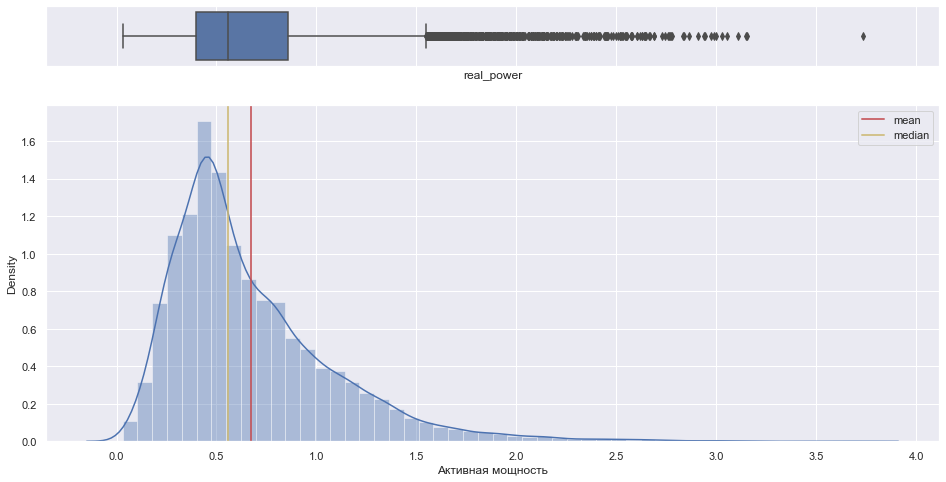

In [14]:
histogram_boxplot(data_arc['real_power'], 'Активная мощность')

Распределение похоже на нормальное, с длиным правым хвостом. Явных аномалий не видно. Построим такой же график для реактивной мощности.

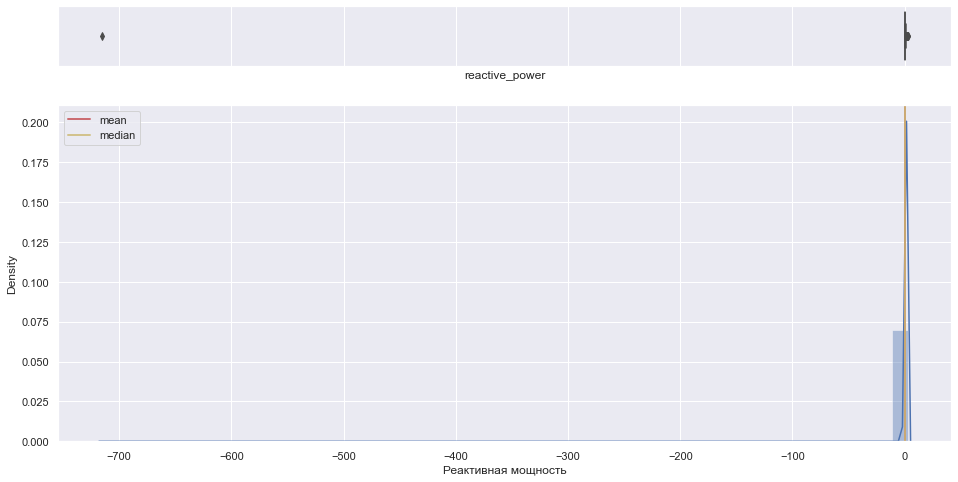

In [15]:
histogram_boxplot(data_arc['reactive_power'], 'Реактивная мощность')

Что-то это не похоже на нормальный график. Судя по всему у нас в данных есть аномалия - очень большое отрицательное значение. Проверим.

In [16]:
data_arc.loc[data_arc['reactive_power'] < 0]

,key,heating_start,heating_end,real_power,reactive_power
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


Попался. Всего одна строка, а так сильно поломала график. Выкинем эту строку из нашего датасета.

In [17]:
data_arc = data_arc.loc[data_arc['reactive_power'] > 0]

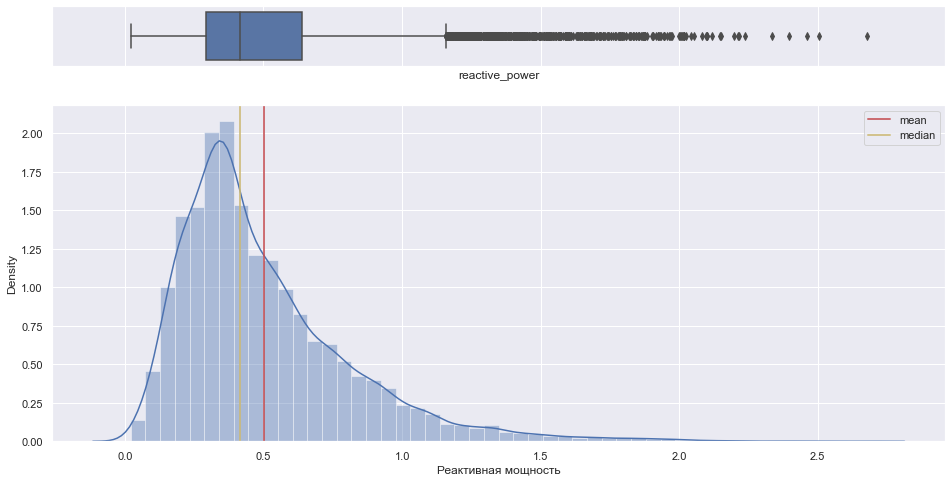

In [18]:
histogram_boxplot(data_arc['reactive_power'], 'Реактивная мощность')

Теперь мы видим картину схожую с активной мощностью. Предобработка данных этого датасета закончена.

#### data_bulk — данные о подаче сыпучих материалов (объём)

In [19]:
df_info(data_bulk)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   252 non-null    float64
 2   bulk_2   22 non-null     float64
 3   bulk_3   1298 non-null   float64
 4   bulk_4   1014 non-null   float64
 5   bulk_5   77 non-null     float64
 6   bulk_6   576 non-null    float64
 7   bulk_7   25 non-null     float64
 8   bulk_8   1 non-null      float64
 9   bulk_9   19 non-null     float64
 10  bulk_10  176 non-null    float64
 11  bulk_11  177 non-null    float64
 12  bulk_12  2450 non-null   float64
 13  bulk_13  18 non-null     float64
 14  bulk_14  2806 non-null   float64
 15  bulk_15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


Количество дубликатов: 0


В данном датасете содержится информация о кусках сплава из бункера для сыпучих материалов, которые подают в ковш с расплавленным материалом для изменения химических свойств стали. В данной таблице нет явных аномалий.

Но в ней много пропусков, которые говорят о том, что для конкретной партии именно такие сыпучие материалы не добавлялись. Заполним пропуски нулями.

In [20]:
data_bulk.fillna(0, inplace=True)

In [21]:
data_bulk

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,0.0,0.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252.0,0.0,130.0,206.0
3125,3238,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,0.0,108.0,106.0
3126,3239,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,158.0,0.0,270.0,88.0
3127,3240,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,54.0


#### data_bulk_time — данные о подаче сыпучих материалов (время)

In [22]:
df_info(data_bulk_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   bulk_1   252 non-null    object
 2   bulk_2   22 non-null     object
 3   bulk_3   1298 non-null   object
 4   bulk_4   1014 non-null   object
 5   bulk_5   77 non-null     object
 6   bulk_6   576 non-null    object
 7   bulk_7   25 non-null     object
 8   bulk_8   1 non-null      object
 9   bulk_9   19 non-null     object
 10  bulk_10  176 non-null    object
 11  bulk_11  177 non-null    object
 12  bulk_12  2450 non-null   object
 13  bulk_13  18 non-null     object
 14  bulk_14  2806 non-null   object
 15  bulk_15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaN,NaN,NaN,2019-05-03 13:59:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:53:27,NaN,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaN,NaN,NaN,2019-05-03 14:29:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:22:19,NaN,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaN,NaN,NaN,2019-05-03 15:04:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:55:46,NaN,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaN,NaN,NaN,2019-05-03 15:47:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:41:00,NaN,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:18:52,NaN,2019-05-03 16:18:52,2019-05-03 16:18:52


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


Количество дубликатов: 0


Изменим тип данных в таблице на `datetime`.

In [23]:
for column in list(data_bulk_time.columns):
    if column != 'key':
        data_bulk_time[column] = pd.to_datetime(data_bulk_time[column],
                                                format='%Y-%m-%d %H:%M:%S')

In [24]:
df_info(data_bulk_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   bulk_1   252 non-null    datetime64[ns]
 2   bulk_2   22 non-null     datetime64[ns]
 3   bulk_3   1298 non-null   datetime64[ns]
 4   bulk_4   1014 non-null   datetime64[ns]
 5   bulk_5   77 non-null     datetime64[ns]
 6   bulk_6   576 non-null    datetime64[ns]
 7   bulk_7   25 non-null     datetime64[ns]
 8   bulk_8   1 non-null      datetime64[ns]
 9   bulk_9   19 non-null     datetime64[ns]
 10  bulk_10  176 non-null    datetime64[ns]
 11  bulk_11  177 non-null    datetime64[ns]
 12  bulk_12  2450 non-null   datetime64[ns]
 13  bulk_13  18 non-null     datetime64[ns]
 14  bulk_14  2806 non-null   datetime64[ns]
 15  bulk_15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaT,NaT,NaT,2019-05-03 11:21:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:03:52,NaT,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaT,NaT,NaT,2019-05-03 11:46:38,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:40:20,NaT,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaT,NaT,NaT,2019-05-03 12:31:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:09:40,NaT,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaT,NaT,NaT,2019-05-03 12:48:43,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:41:24,NaT,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaT,NaT,NaT,2019-05-03 13:18:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:12:56,NaT,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaT,NaT,NaT,2019-05-03 13:59:24,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:53:27,NaT,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaT,NaT,NaT,2019-05-03 14:29:14,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 14:22:19,NaT,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaT,NaT,NaT,2019-05-03 15:04:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 14:55:46,NaT,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaT,NaT,NaT,2019-05-03 15:47:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 15:41:00,NaT,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 16:18:52,NaT,2019-05-03 16:18:52,2019-05-03 16:18:52


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


Количество дубликатов: 0


В этой таблице содержатся данные о времени, когда подавались те или иные сыпучие материалы из предыдущей таблицы. 

#### data_gas — данные о продувке сплава газом

In [25]:
df_info(data_gas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas_1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


,key,gas_1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


,key,gas_1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


Количество дубликатов: 0


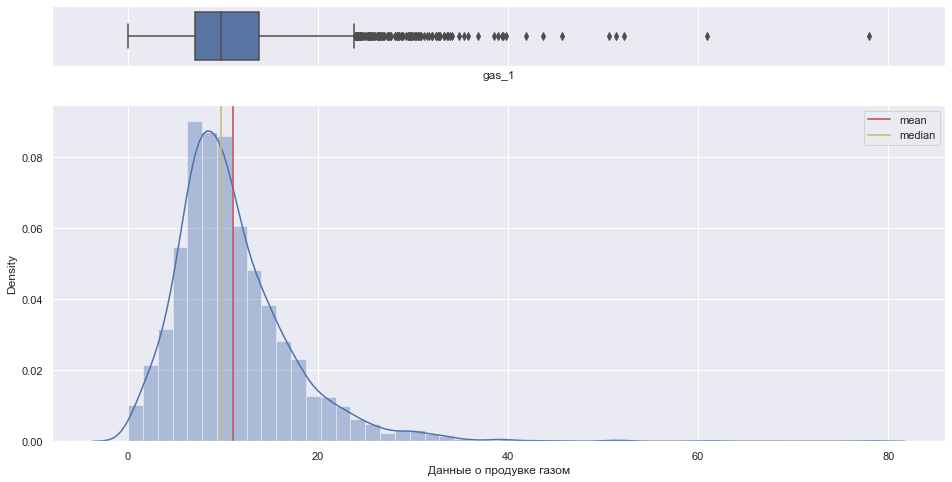

In [26]:
histogram_boxplot(data_gas['gas_1'], 'Данные о продувке газом')

Данные о продувке сплава инертным газом выглядят вполне правдоподобно. Есть длинный правый хвост, но значения не похожи на явные аномалии.

#### data_temp — результаты измерения температуры

In [27]:
df_info(data_temp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   key               15907 non-null  int64  
 1   measurement_time  15907 non-null  object 
 2   temperature       13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


,key,measurement_time,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


,key,temperature
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


Количество дубликатов: 0


In [28]:
data_temp['measurement_time'] = pd.to_datetime(data_temp['measurement_time'],
                                               format='%Y-%m-%d %H:%M:%S')

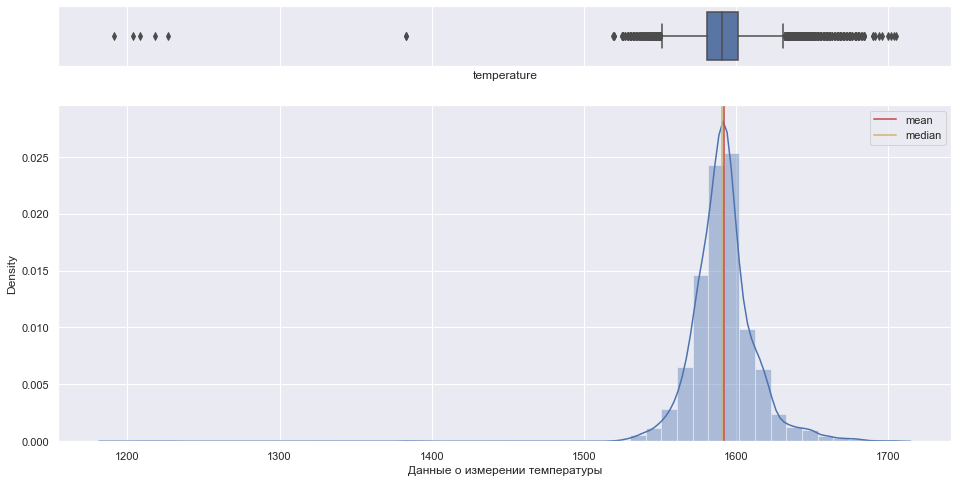

In [29]:
histogram_boxplot(data_temp['temperature'], 'Данные о измерении температуры')

Распределение нормальное. Есть выбросы ниже 1500 градусов. Взгялнем на них.

In [30]:
data_temp.loc[data_temp['temperature'] < 1500]

,key,measurement_time,temperature
4350,867,2019-06-04 14:21:00,1191.0
5978,1214,2019-06-16 05:32:00,1208.0
7958,1619,2019-06-30 11:03:54,1218.0
8913,1818,2019-07-07 00:30:49,1383.0
8914,1818,2019-07-07 00:31:40,1383.0
10127,2052,2019-07-21 14:51:40,1227.0
12564,2561,2019-08-08 07:34:15,1204.0


Из более чем 15000 замеров у нас есть 7 замеров, которые сильно отличаются от всей выборки. Можно предположить, что эти замеры были сделаны слишком рано во время технологического процесса. Согласно [источнику](https://www.google.com/search?q=%D1%82%D0%B5%D0%BC%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%B0+%D0%BF%D0%BB%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F+%D1%81%D1%82%D0%B0%D0%BB%D0%B8&rlz=1C1GCEA_enRU867RU867&oq=%D1%82%D0%B5%D0%BC%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%B0+%D0%BF%D0%BB%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F+%D1%81%D1%82%D0%B0%D0%BB%D0%B8&aqs=chrome..69i57j0i433l2j0l3j0i433j0l3.5896j1j7&sourceid=chrome&ie=UTF-8) температура плавления стали находится в диапазоне 1450-1520 градусов цельсия. Поэтому такие значения являются явными аномалиями и нам стоит от них избавиться. 

In [31]:
data_temp = data_temp.loc[data_temp['temperature'] > 1500]

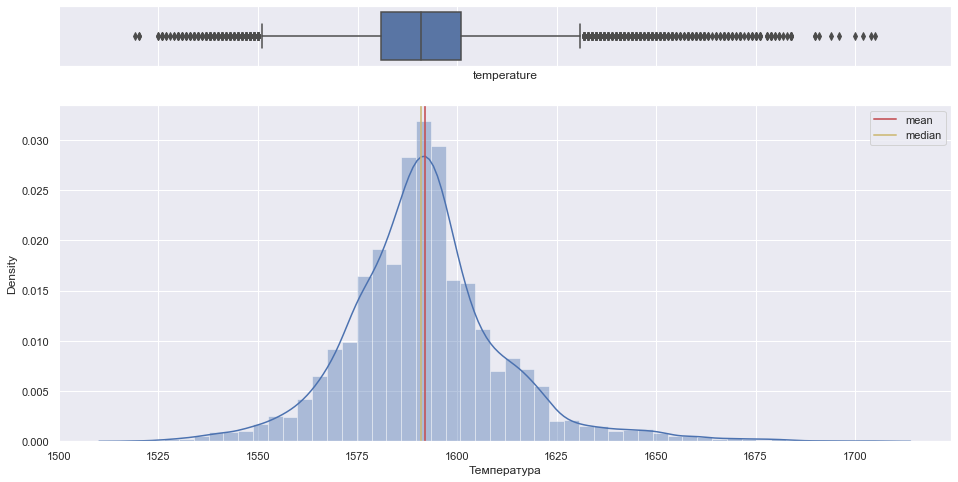

In [32]:
histogram_boxplot(data_temp['temperature'], 'Температура')

При более внимательном осмотре этого датасета нужно обратить внимание, что в нем отсутствуют данные о температуре для довольно большого количества строк.
Посмотрим, сколько замеров температуры было сделанно для каждой партии стали.

In [33]:
#Аггрегируем данные по количеству замеров для каждой партии
temp_probs_per_key = data_temp.pivot_table(values=['temperature'], index='key', aggfunc='count')
#Сбросим индекс, чтобы еще раз произвести подсчет количества партий с каждым количеством замеров
temp_probs_per_key.reset_index(inplace=True)
#Аггрегируем данные, чтобы получить количество партий для каждого количества замеров
temp_probs_per_key = temp_probs_per_key.pivot_table(values='key', index='temperature', aggfunc='count')

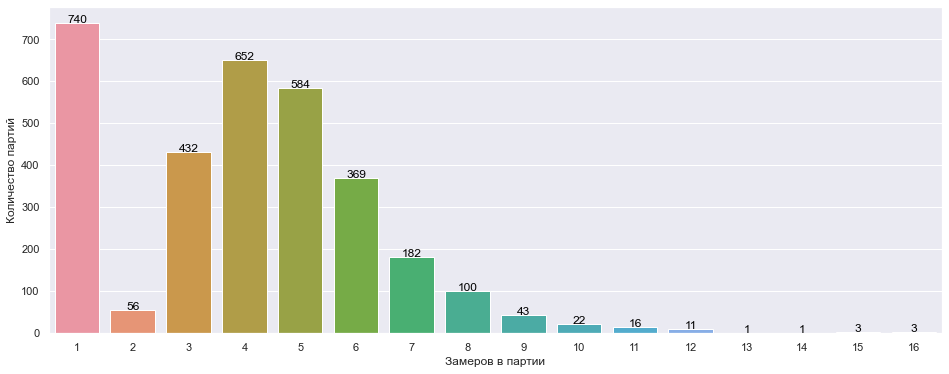

In [34]:
ax = sns.barplot(x = temp_probs_per_key.index, y = temp_probs_per_key['key'], 
              data = temp_probs_per_key)
ax.set(xlabel='Замеров в партии', ylabel='Количество партий')

for index, row in temp_probs_per_key.iterrows():
    ax.text(row.name - 1, row.key, round(row.key), color='black', ha="center")

plt.show()

Для 740 партий у нас есть информация лишь по одному замеру. Мы не можем использовать данные этих замеров, потому что у нас нет уверенности, что именно этот один замер для этой партии был последним. Составим список хороших партий, для которых у нас более одного замера температуры.

In [35]:
#Еще раз сделаем аггрегацию данных по количеству замеров для каждой партии
temp_probs_per_key = data_temp.pivot_table(values=['temperature'], index='key', aggfunc='count')
#Создадим список с номерами партий в которых более одного замера температуры
good_batches = list(temp_probs_per_key.loc[temp_probs_per_key['temperature'] > 1].index)

#### data_wire — данные о проволочных материалах (объём)

In [36]:
df_info(data_wire)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3055 non-null   float64
 2   wire_2  1079 non-null   float64
 3   wire_3  63 non-null     float64
 4   wire_4  14 non-null     float64
 5   wire_5  1 non-null      float64
 6   wire_6  73 non-null     float64
 7   wire_7  11 non-null     float64
 8   wire_8  19 non-null     float64
 9   wire_9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


Количество дубликатов: 0


Данные по проволочным материалам, добавляемым во время технологического процесса не содержат явных аномалий. 

Но в них много пропусков, как и в таблице по сыпучим материалам. Заполним пропуски нулями.

In [37]:
data_wire.fillna(0, inplace=True)

#### data_wire_time — данные о проволочных материалах (время)

In [38]:
df_info(data_wire_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   wire_1  3055 non-null   object
 2   wire_2  1079 non-null   object
 3   wire_3  63 non-null     object
 4   wire_4  14 non-null     object
 5   wire_5  1 non-null      object
 6   wire_6  73 non-null     object
 7   wire_7  11 non-null     object
 8   wire_8  19 non-null     object
 9   wire_9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:59:02,2019-05-03 13:59:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:28:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:42:43,2019-05-03 15:58:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:20:25,2019-05-03 16:21:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


Количество дубликатов: 0


Аналогично таблице со временем добавления сыпучих материалов, для этой таблицы требуется приведение типа данных к `datetime`.

In [39]:
for column in list(data_wire_time.columns):
    if column != 'key':
        data_wire_time[column] = pd.to_datetime(data_wire_time[column],
                                                format='%Y-%m-%d %H:%M:%S')

### Вывод после осмотра данных

Данные, которые нам предоставленны для построения модели оказались довольно чистыми. Потребовалась минимальная предобработка, чтобы получить датасеты пригодные для дальнейшей работы. Мы сделали:
- Приведение типов данных
- Очистку от явных аномалий
- Предварительную оценку фронта работы

### План дальнейшей работы 

После обсуждения задачи с тимлидом было уточненно, что нам требуется предсказывать финальную температуру для каждой партии. В связи с этим не имеет смысла рассматривать наши данные как временые ряды. Можно сделать предварительное предположение, что на конечную температуру сильнее всего будут влиять следующие факторы:
- Время и мощность нагрева
- Количество и тип добавленных в рассплав материалов
- Интенсивность продувки газом

План дальнейшей работы:
1. Выделение из датасета температур последнего замера для каждой партии
2. Объединение датасетов по ключу партии
3. Создание дополнительных признаков:
    - Суммарная мощность
    - Время нагрева
    - ...
4. Проверка признаков на корреляцию, разбиение финального датасета на обучающую и тестовую выборки
5. Выбор модели МЛ:
    - линейная регрессия
    - случайный лес
    - XGBoost
    - CatBoost
6. Подборка гиперпараметров модели
7. Проверка модели на тесовой выборке
8. Написание отчета

## Построение общей таблицы признаков для обучения модели

Займемся созданием сводной таблицы, на основе которой будем обучать нашу модель. Признаки, которые будут включены в таблицу:
- Температура последнего замера для партии - **целевой признак**
- Температура первого замера партии
- Время нагрева
- Количество иттераций нагрева
- Активная, реактивная и полная мощность
- Количество добавленных сыпучих материалов
- Количество добавленных проволочных материалов
- Объем газа на продувку

После составления таблицы проверим признаки на корреляцию и оставим те, которые будут наименее скоррелированы.

Начнем с таблицы с данными о нагреве. 

In [40]:
#Создадим новый признак "heating_full_time", представим его в секундах
def full_time(row):
    return row['heating_end'] - row['heating_start']

data_arc['heating_full_time'] = data_arc.apply(full_time, axis=1)
data_arc['heating_full_time'] = data_arc['heating_full_time'].dt.seconds

In [41]:
#Добавим в нашу таблицу полную мощность
def full_power(row):
    return math.sqrt(row['real_power']**2 + row['reactive_power']**2)

data_arc['full_power'] = data_arc.apply(full_power, axis=1)

Определим количество итераций нагрева.

In [42]:
itterations_data_arc = data_arc.groupby(by='key', as_index=False).count()[['key', 'heating_start']]
itterations_data_arc.columns = ['key', 'itter_number']

Сгруппируем данные по партиям, но сначала уберем из таблицы ненужные нам в дальнейшем колонки с временем начала и окончания нагрева.

In [43]:
data_arc.drop(['heating_start', 'heating_end'], axis=1, inplace=True)

In [44]:
data_arc = data_arc.groupby(by='key', as_index=False).sum()

In [45]:
data_arc

,key,real_power,reactive_power,heating_full_time,full_power
0,1,4.878147,3.183241,1098,5.826395
1,2,3.052598,1.998112,811,3.649216
2,3,2.525882,1.599076,655,2.989534
3,4,3.209250,2.060298,741,3.814962
4,5,3.347173,2.252643,869,4.035758
...,...,...,...,...,...
3209,3237,3.932467,2.828459,909,4.844982
3210,3238,2.106529,1.681182,546,2.696542
3211,3239,4.666754,3.111617,1216,5.611883
3212,3240,2.984083,2.483267,839,3.891856


Теперь соеденим две таблицы и оставим в получившейся только те партии, для которых у нас больше одного замера температуры.

In [46]:
data_arc = data_arc.merge(itterations_data_arc, how = 'left', on = 'key')

Займемся таблицей с температурами. Сгрупируем данные по партиям и создадим две колонки - `first_temp` и `last_temp`. `last_temp` - наш целевой признак.

In [47]:
data_temp = data_temp.groupby(by = 'key').agg(['first', 'last']).reset_index()
data_temp.columns = data_temp.columns.droplevel()
data_temp.columns = ['key', 'time_first', 'time_last', 'first_temp', 'last_temp']
data_temp.drop(['time_first', 'time_last'], axis=1, inplace=True)

Теперь соеденим все в одну таблицу.

In [48]:
full_data = (data_arc.merge(data_temp, how='outer', on='key').
             merge(data_bulk, how='outer', on='key').
             merge(data_wire, how='outer', on='key').
             merge(data_gas, how='outer', on='key')
            )

Оставим в таблицы данные только для тех партий, для которых у нас больше одного замера температуры.

In [49]:
full_data = full_data.query('key in @good_batches')

Посмотрим что получилось.

In [50]:
df_info(full_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                2475 non-null   int64  
 1   real_power         2475 non-null   float64
 2   reactive_power     2475 non-null   float64
 3   heating_full_time  2475 non-null   float64
 4   full_power         2475 non-null   float64
 5   itter_number       2475 non-null   float64
 6   first_temp         2475 non-null   float64
 7   last_temp          2475 non-null   float64
 8   bulk_1             2407 non-null   float64
 9   bulk_2             2407 non-null   float64
 10  bulk_3             2407 non-null   float64
 11  bulk_4             2407 non-null   float64
 12  bulk_5             2407 non-null   float64
 13  bulk_6             2407 non-null   float64
 14  bulk_7             2407 non-null   float64
 15  bulk_8             2407 non-null   float64
 16  bulk_9             2407 

,key,real_power,reactive_power,heating_full_time,full_power,itter_number,first_temp,last_temp,bulk_1,bulk_2,...,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,gas_1
0,1,4.878147,3.183241,1098.0,5.826395,5.0,1571.0,1613.0,0.0,0.0,...,60.059998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.749986
1,2,3.052598,1.998112,811.0,3.649216,4.0,1581.0,1602.0,0.0,0.0,...,96.052315,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.555561
2,3,2.525882,1.599076,655.0,2.989534,5.0,1596.0,1599.0,0.0,0.0,...,91.160157,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.554793
3,4,3.209250,2.060298,741.0,3.814962,4.0,1601.0,1625.0,0.0,0.0,...,89.063515,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.841219
4,5,3.347173,2.252643,869.0,4.035758,4.0,1576.0,1602.0,0.0,0.0,...,89.238236,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.413692
5,6,3.955108,2.689175,952.0,4.786837,4.0,1543.0,1596.0,0.0,0.0,...,99.109917,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.273392
6,7,2.547375,1.561295,673.0,2.987777,4.0,1586.0,1599.0,0.0,0.0,...,98.061600,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.836267
7,8,3.762755,2.680698,913.0,4.627389,4.0,1577.0,1598.0,0.0,0.0,...,155.282394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.171553
8,9,2.081951,1.478671,625.0,2.555348,5.0,1587.0,1592.0,0.0,0.0,...,113.393279,9.143681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.216623
9,10,2.923622,2.496116,825.0,3.851739,6.0,1574.0,1593.0,0.0,0.0,...,81.244796,12.376000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.529891


,key,real_power,reactive_power,heating_full_time,full_power,itter_number,first_temp,last_temp,bulk_1,bulk_2,...,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,gas_1
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2407.000000,2407.000000,...,2372.000000,2372.000000,2372.000000,2372.000000,2372.0,2372.000000,2372.000000,2372.000000,2372.000000,2473.000000
mean,1250.787071,3.127428,2.330686,799.907879,3.909335,4.625455,1589.029899,1595.336162,3.316577,1.376402,...,102.264474,17.856377,3.176273,0.300993,0.0,0.961076,0.006245,0.305667,0.414319,11.142960
std,719.787271,1.426047,1.078666,340.838756,1.778325,1.610369,24.998058,16.023153,12.224364,18.771950,...,43.641222,33.944219,27.691693,4.714583,0.0,8.615099,0.203833,4.362799,4.331678,6.323742
min,1.000000,0.186226,0.158247,57.000000,0.257637,1.000000,1519.000000,1541.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.008399
25%,629.500000,2.148302,1.607333,573.000000,2.692521,4.000000,1572.000000,1587.000000,0.000000,0.000000,...,72.859018,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.105241
50%,1252.000000,3.016373,2.229479,772.000000,3.755583,4.000000,1588.000000,1593.000000,0.000000,0.000000,...,101.087998,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,9.926730
75%,1872.500000,3.908051,2.905603,986.500000,4.874185,6.000000,1605.000000,1599.000000,0.000000,0.000000,...,128.143076,23.162880,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,13.872219
max,2499.000000,17.496497,12.587990,4189.000000,21.564771,16.000000,1679.000000,1700.000000,185.000000,325.000000,...,330.314424,282.780152,385.008668,113.231044,0.0,180.454575,8.490040,102.762401,90.053604,77.995040


Количество дубликатов: 0


Как видно из данных метода `info` у нас есть пропуски для данных по сыпучим материалам, проволке и объему газа на продувке. Больше всего пропусков по данным о подаче проволоки. Видимо не для всех партий из таблицы с температурой и мощностью есть данные из остальных таблиц. Заполним пропуски нулями. 

In [51]:
full_data.fillna(0, inplace=True)

## Проверка корреляции признаков

Нам необходимо промасштабировать данные и проверить их на мультиколениарность перед началом обучения моделей. Напишем функцию которая будет возвращать таблицу пар столбцов, корреляция которых выше заданого порога.

In [52]:
def correlations_table(df, threshold=0.8):
    cor_matrix = df.corr()
    threshold = threshold
    important_corrs = (cor_matrix[abs(cor_matrix) > threshold][cor_matrix != 1]
                       ).unstack().dropna().to_dict()

    unique_important_corrs = pd.DataFrame(
        list(
            set([(tuple(sorted(key)), important_corrs[key])
                 for key in important_corrs])),
        columns=['attribute pair', 'correlation'])

    unique_important_corrs = unique_important_corrs.iloc[abs(
        unique_important_corrs['correlation']).argsort()[::-1]]
    unique_important_corrs.reset_index(drop=True, inplace=True)

    return unique_important_corrs

In [53]:
correlations_table(full_data)

,attribute pair,correlation
0,"(full_power, real_power)",0.993677
1,"(full_power, reactive_power)",0.985069
2,"(full_power, heating_full_time)",0.982899
3,"(heating_full_time, real_power)",0.978192
4,"(bulk_9, wire_8)",0.974976
5,"(heating_full_time, reactive_power)",0.966462
6,"(reactive_power, real_power)",0.959727


<Figure size 1440x720 with 0 Axes>

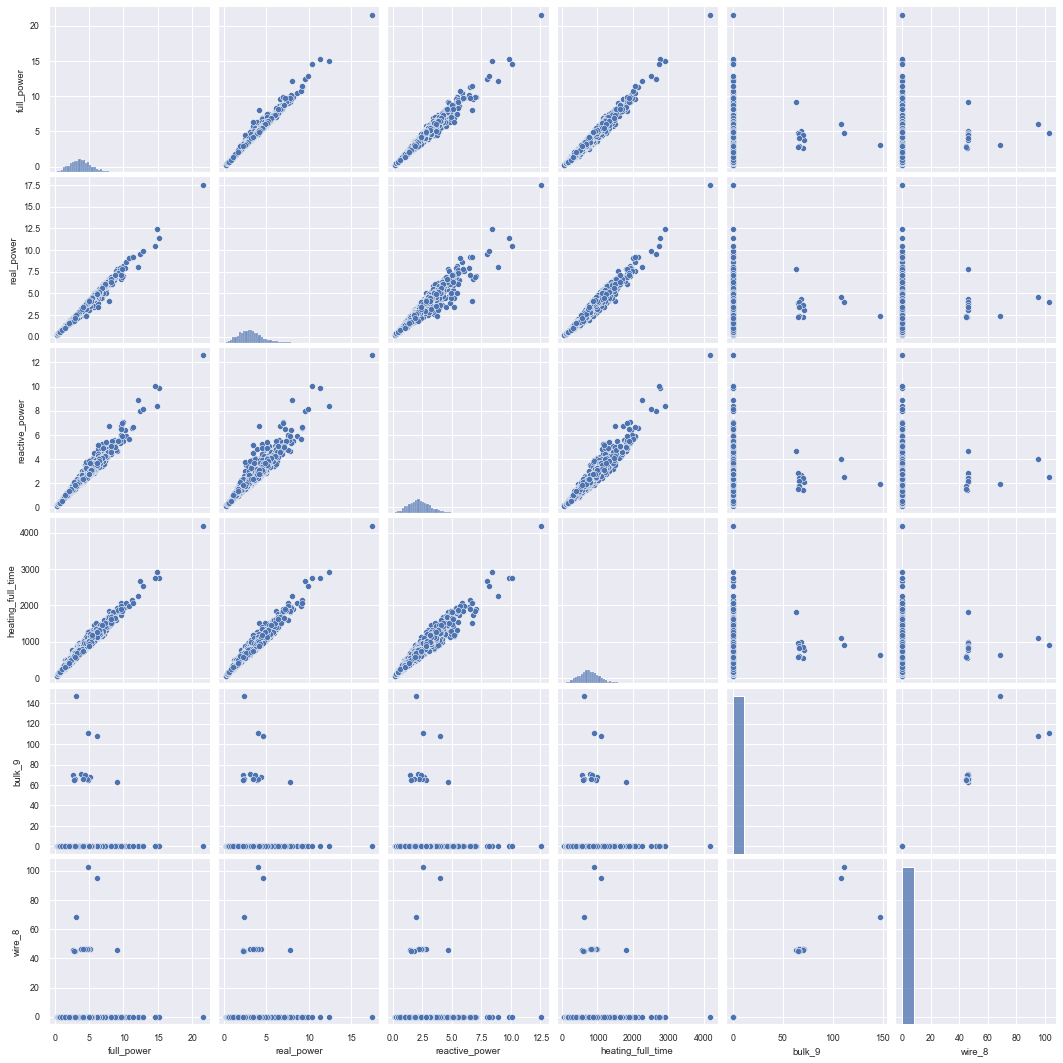

In [54]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=0.8)
sns.pairplot(full_data[[
    'full_power', 'real_power', 'reactive_power', 'heating_full_time',
    'bulk_9', 'wire_8'
]],
             kind="scatter")
plt.show();

Как видно из полученной таблицы и из графиков у нас есть несколько очень сильно скоррелированных признаков. Это вполне логично, что все виды энергии потраченной на нагрев имеют практически прямую зависимость, а так же зависят от времени нагрева. Из этих четырех признаков оставим в датасете только полную мощность, потраченную на нагрев. Заодно избавимся от колонки `key` - она нашей модели абсолютно не нужна.

А вот `bulk_9` и `wire_8` хоть и имеют сильную корреляцию по формуле, так же имеют очень маленькое количество точек, так что их мы пока оставим. 

In [55]:
full_data_wo_corr = full_data.drop(
    ['real_power', 'reactive_power', 'heating_full_time', 'key'], axis=1)

## Разбиение данных и масштабирование признаков

Следующая функция поможет нам произвести разбиение нашего датасета на обучающую и тестовую выборки. Валидационную выделять не будем, так как планируем использовать кросс-валидацию при обучении моделей и подборке гиперпараметров.

In [56]:
def split_df_regression(df,
                        target_column_name: str,
                        valid_test_flag: bool,
                        seed=SEED):
    '''
    This function takes dataframe, target column name and a flag, which means should it return train-valid-test df's 
    (features_train, features_valid, features_test and target_train, target_valid, target_test) or only train-test.
    In case if flag = False, than the function will split the df in proportion 75/25, if True - 60/20/20.
    '''

    from sklearn.model_selection import train_test_split

    if valid_test_flag:
        df_train, df_valid = train_test_split(df,
                                              test_size=0.2,
                                              random_state=seed)
        df_train, df_test = train_test_split(df_train,
                                             test_size=0.25,
                                             random_state=seed)

        features_train = df_train.drop([target_column_name], axis=1)
        target_train = df_train[target_column_name]

        features_valid = df_valid.drop([target_column_name], axis=1)
        target_valid = df_valid[target_column_name]

        features_test = df_test.drop([target_column_name], axis=1)
        target_test = df_test[target_column_name]

        return features_train, features_valid, features_test, target_train, target_valid, target_test

    df_train, df_test = train_test_split(df, test_size=0.25, random_state=seed)

    features_train = df_train.drop([target_column_name], axis=1)
    target_train = df_train[target_column_name]

    features_test = df_test.drop([target_column_name], axis=1)
    target_test = df_test[target_column_name]

    return features_train, features_test, target_train, target_test

In [57]:
X_train, X_test, y_train, y_test = split_df_regression(full_data_wo_corr,
                                                       'last_temp', False,
                                                       SEED)

Для некоторых алгоритмов, которые мы собираемся использовать необходимо произвести масштабирование признаков. Для этого воспользуемся `StandartScaler`.

In [58]:
full_data_wo_corr.columns

Index(['full_power', 'itter_number', 'first_temp', 'last_temp', 'bulk_1',
       'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6', 'bulk_7', 'bulk_8',
       'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12', 'bulk_13', 'bulk_14',
       'bulk_15', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6',
       'wire_7', 'wire_8', 'wire_9', 'gas_1'],
      dtype='object')

In [59]:
scaler = StandardScaler()

numeric_columns = [
    'full_power', 'first_temp', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4',
    'bulk_5', 'bulk_6', 'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11',
    'bulk_12', 'bulk_13', 'bulk_14', 'bulk_15', 'wire_1', 'wire_2', 'wire_3',
    'wire_4', 'wire_5', 'wire_6', 'wire_7', 'wire_8', 'wire_9', 'gas_1'
]

scaler.fit(X_train[numeric_columns])

X_train[numeric_columns] = scaler.transform(X_train[numeric_columns])

X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

## Обучение моделей

Для нашей задачи попробуем обучить несколько моделей:
- Линейная регрессия
- Случайный лес
- XGBoost
- CatBoost

При обучении моделей будем использовать метод кроссвалидации. Чтобы все работало соберем модели и гиперпараметры, которые будем подбирать в отдельные словари.

In [60]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(),
    'XGBRegressor': xgboost.XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor()
}

In [61]:
params = {
    'LinearRegression': {
        'fit_intercept': [True, False],
        'normalize': [True, False],
        'n_jobs': [-1]
    },
    'RandomForest': {
        'n_estimators': [10, 50, 100],
        'criterion': ['mae'],
        'max_depth': [2, 5, 10, 20, 40],
        'min_samples_split': [2, 4, 6],
        'random_state': [SEED],
        'n_jobs': [-1]
    },
    'XGBRegressor': {
        'min_child_weight': [5, 10, 20, 30],
        'gamma': [5],
        'subsample': [1.0],
        'colsample_bytree': [1.0],
        'max_depth': [5, 10, 20],
        'eval_metric': ['mae'],
        'verbosity': [0],
        'n_jobs': [-1],
        'random_state': [SEED]
    },
    'CatBoostRegressor': {
        'loss_function': ['MAE'],
        'n_estimators': np.arange(100, 300, 500),
        'learning_rate': np.arange(0.03, 0.12, 0.02),
        'random_state': [SEED],
        'depth': range(2, 10, 2),
        'verbose': [0]
    }
}

Следущая функция получает на вход признаки для обучения и проверки моделей, сами модели и параметры, которые будут подбираться в процессе обучения.

In [62]:
def fit_all_models(X_train, y_train, X_test, y_test, models, params):
    result_list = []
    for name in models.keys():
        est = models[name]
        est_params = params[name]
        gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=5)
        gscv.fit(X_train, y_train)
        train_predictions = gscv.predict(X_train)
        predictions = gscv.predict(X_test)
        result_list.append({
            'estimator':
            name,
            'train_MAE':
            mean_absolute_error(y_train, train_predictions),
            'test_MAE':
            mean_absolute_error(y_test, predictions),
            'best_parameters':
            gscv.best_params_
        })
    results = pd.DataFrame(
        result_list,
        columns=['estimator', 'train_MAE', 'test_MAE', 'best_parameters'])
    results.set_index("estimator", inplace=True)
    return results

In [63]:
%%time

results = fit_all_models(X_train, y_train, X_test, y_test, models, params)
results

Wall time: 6min 36s


,train_MAE,test_MAE,best_parameters
estimator,,,
LinearRegression,7.666063,7.822405,"{'fit_intercept': True, 'n_jobs': -1, 'normali..."
RandomForest,3.149677,6.195767,"{'criterion': 'mae', 'max_depth': 20, 'min_sam..."
XGBRegressor,0.654693,6.479715,"{'colsample_bytree': 1.0, 'eval_metric': 'mae'..."
CatBoostRegressor,5.628781,5.978068,"{'depth': 4, 'learning_rate': 0.09000000000000..."


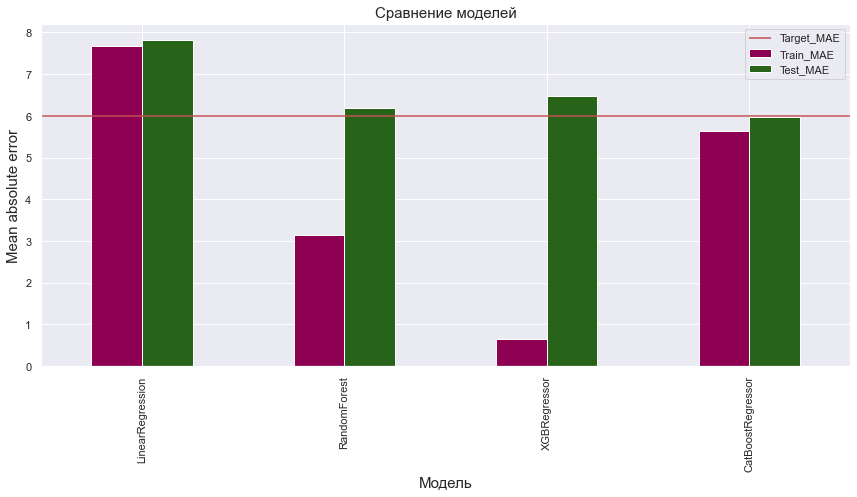

In [64]:
plt.figure(figsize=(12, 7))
plt.subplot(111)
results.plot(kind='bar', ax=plt.gca(), fontsize=11,
             colormap='PiYG').hlines(6, -1, 5, color='r')
plt.legend(['Target_MAE', 'Train_MAE', 'Test_MAE'], fontsize=11)
plt.xlabel('Модель', fontsize=15)
plt.ylabel('Мean absolute error', fontsize=15)
plt.title('Сравнение моделей', fontsize=15)
plt.tight_layout()

Как видно из графика и таблицы в соревновании по точности предсказания побеждает `CatBoost`. Линейная регрессия показала самые плохие результаты как на обучающей выборке, так и на тестовой. Случайный лес и XGBRegressor имеют сильную тенденцию к переобучению на обучающей выборке, но на тестовой все равно показывают результаты хуже чем CatBoost.

Обучим нашу модель CatBoost с лучшими параметрами и взглянем на важность признаков.

In [65]:
#Сохраним лучшие параметры полученные при обучение нашей модели в отдельную переменную
best_cb_params = results['best_parameters']['CatBoostRegressor']

In [66]:
#Создадим экземпляр модели и обучим ее
best_model = CatBoostRegressor().set_params(**best_cb_params)
best_model.fit(X_train, y_train)
#Проверим, что наша модель выдает ожидаемый результат
mean_absolute_error(y_test, best_model.predict(X_test))

5.9780679575471884

Давайте построим график важности признаков для нашей модели.

In [67]:
feature_importance = pd.DataFrame(data=best_model.feature_importances_,
                                  index=X_test.columns)
feature_importance.columns = ['feature_importance']
feature_importance.sort_values(by='feature_importance',
                               inplace=True,
                               ascending=False)

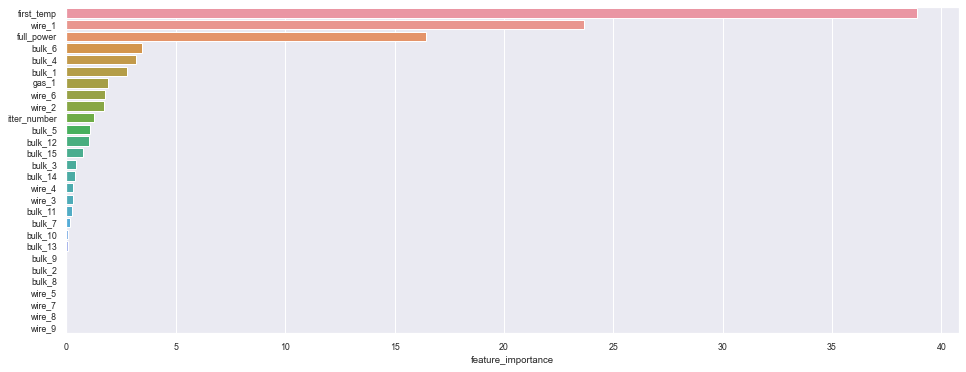

In [68]:
sns.barplot(x=feature_importance['feature_importance'],
            y=feature_importance.index)

Как видно из полученного графика наибольшее влияние на предсказание конечной температуры сплава оказывают начальная температура плавления, добавка проволочного материала №1 и мощность нагрева.

## Вывод

В ходе нашего исследования была проделана следущая работа:
- Произведены загрузка, осмотр и предварительная обработка данных
- Удалены выбросы, определены данные необходимые для построения модели
- Все данные были агрегированы в одну таблицу, признаки проверены на корреляцию, выбраны релевантные признаки для модели
- Масштабирование признаков и разбиение данных на обучающую и тестовую выборки
- Исследованы несколько моделей
- Полученные модели были сравнены по целевой метрики на тестовой выборки

Как результат работы мы получили модель `CatBoostRegressor`, которая на тестовой выборке показала результат ключевой метрики абсолютной ошибки ниже шести. 

Перед нами стояла задача построить модель, которая сможет с высокой точностью предсказывать конечную температуру рассплавленного металла. Позже эту модель планируется использовать на производстве для оптимизации потребления электроэнергии. Дальнейшее улучшение модели можно получить разбив и стандартизировав процесс произведения замеров температуры на производстве. Можно построить модель, которая получая на вход данные о уже произведенных технологических процессах по этапам сможет предсказывать какую мощность необходимо применить, чтобы добиться нужной температуры металла. Для этого полезными могут оказаться такие данные как конкретные физические свойства добавляемых маттериалов и их количество. 

## Отчет

После осмотра датасетов нами был составлен план работы. Давайте взглянем на него еще раз и прокоментируем проделанные шаги:
- [x] Выделение из датасета температур последнего замера для каждой партии

*Прежде всего мы проверили наш датасет и обнаружили, что для довольно большого количества партий в датасете был лишь один замер температуры. Было принято решение не использовать данные по таким партиям для обучения модели. Помимо последней температуры как целевого признака, мы выделил из датасета первую (начальную) температуру как дополнительный признак для нашей модели. После построения модели и проверки важности признаков, мы подтвердили нашу догадку о важности этого признака - начальная температура оказалась самым важным параметром для нашей модели.*

- [x] Объединение датасетов по ключу партии

*Этот пункт выполнен в соответствии с планом*

- [x] Создание дополнительных признаков:
    - Суммарная мощность
    - Время нагрева
    - ...
    
*В процессе осмотра признаков дополнительно в таблицу были введены следующие столбцы:*
- *Суммарная мощность*
- *Количество иттераций нагрева*
- *Начальная температура для каждой партии*
- *Суммарное время нагрева для каждой партии*


- [x] Проверка признаков на корреляцию, разбиение финального датасета на обучающую и тестовую выборки

*При проверке признаков на мультиколлениарность мы обнаружили практические прямые зависимости между всеми видами мощности и временем нагрева. После анализа корреляций было принято решение оставить в таблице только общую мощность.*

- [x] Выбор модели МЛ:
    - линейная регрессия
    - случайный лес
    - XGBoost
    - CatBoost
- [x] Подборка гиперпараметров модели

*Все предвыбранные модели были проверены нами. Гиперпараметры моделей подбирались методом кроссвалидации. В результате обнаружено, что:
- *Линейная регрессия не смогла дать хороший результат метрики*
- *Случайный лес и XGBoost имеют сильную тенденцию к переобучению и так же показали не самые лучшие результаты на тестовой выборке*
- *Наш выбор - CatBoostRegressor. Лучший результат метрики и очень близкие показатели на обучающей и тестовой выборках, что говорит, что модель не получилась сильно переобученной.*


- [x] Проверка модели на тестовой выборке

*Проверка делалась еще в ходе подборки гиперпарметров. В результате мы получили модель с лучшими параметрами и можем отдавать ее заказчику.*

- [x] Написание отчета

*Делаем прямо сейчас))*

По ходу выполнения задачи основными трудностями были незнание предметной области и отсутствие четкого понимания взаимосвязей в предоставленных данных. Изначальная формулировка задачи потребовала уточнения у тимлида. Так же полезными оказались сведения по специфике производства полученные от коллег и из внешних источников. Некторые из предоставленных датасетов оказались бесполезны для решения поставленной задачи.

Ключевыми шагами при решении задачи стали:
- Сбор сведений о технологии производства стали
- Обработка полученных данных, поиск аномалий, пропусков значений, определение необходимых признаков
- Анализ полученных признаков
- Обучение моделей и подбор гиперпараметров
- Анализ полученной модели, ее соответствия поставленной задаче и определение дальнейших шагов, по тому, как наша модель может положительно повлиять на основную проблему клиента.

Как уже говорилось выше финальной моделью мы выбрали `CatBoostRegressor`. Она позволяет нам делать предсказания с абсолютной ошибкой не более 6 градусов, при этом не имеет тенденции к переобучению. Модель может быть более точечно настроенна за счет увеличения обучающей выборки. Положительно может сказаться на качестве модели добавления сведений о партиях в которые добавлялись более редкие сыпучие или проволочные материалы. Так же следует дать рекомендацию бизнесу более четко следить за процессом сбора данных - после 2500 партии качество информации стало сильно хуже.